<a href="https://colab.research.google.com/github/nnttluna/tumor_type-classification/blob/main/breast_cancer_classification_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Portfolio/breast_cancer_classification.csv')
print(data.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

In [3]:
y = list(map(lambda v: '1' if v == 'B' else '0', data['diagnosis'].values)) #target values as string
X = data[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean','smoothness_mean','compactness_mean',
          'concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean', 'radius_se','texture_se',
          'perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','radius_worst',
          'texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst',
          'symmetry_worst','fractal_dimension_worst']].values # features values

In [4]:
print(len(y))
# We'll take 400 examples to train and the rest to the validation process
y_train = y[:400]
y_val = y[400:]
X_train = X[:400]
X_val = X[400:]

569


In [5]:
# import the class
from sklearn.linear_model import LogisticRegression
# instantiate the model (using the default parameters)
logreg = LogisticRegression(solver='lbfgs',class_weight='balanced',max_iter=10000)
# fit the model with data
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_val)

In [6]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_val, y_pred)
cnf_matrix

array([[ 39,   0],
       [ 12, 118]])

In [7]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 427.9555555555555, 'Predicted label')

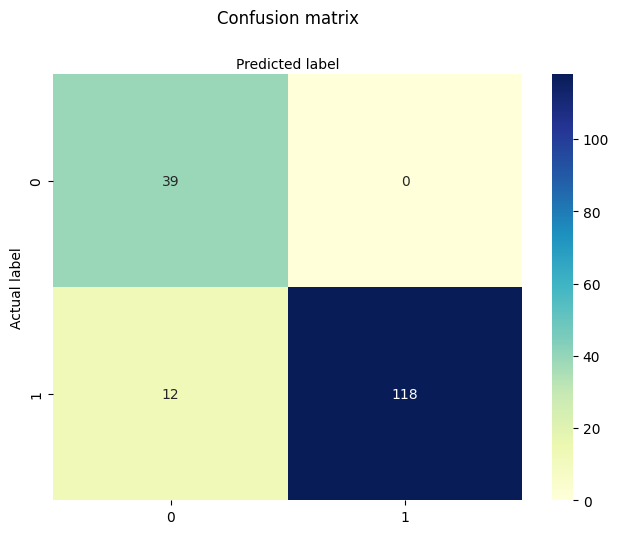

In [8]:
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [9]:
print("Accuracy:", metrics.accuracy_score(y_val, y_pred))

Accuracy: 0.9289940828402367
